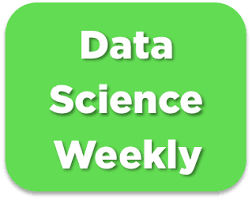

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
pip install plotly -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [7]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [8]:
(data.loc[data.converted == 1,'converted'].count())/(data.loc[data.converted == 0,'converted'].count())

0.03333333333333333

## Age

In [9]:
data = data.loc[data['age']<100,:]

# Make your model

### séparer les données en fonction du nombre de pages

In [10]:
data0 = data.loc[data.age<=59,:]

In [15]:
# On sépare le dataset en 3 parties: 12<x<17, 8<x<12 , (x<8) & (x>17) avec x = nb de pages visitées
data1a = data.loc[(data['total_pages_visited']<=17) & (data['total_pages_visited']>= 12) & (data['country'] != 'China'),:]
data1b = data.loc[(data['total_pages_visited']>= 8) & (data['total_pages_visited']< 12) & (data['country'] != 'China'),:]

data2 = data.loc[(data['total_pages_visited']>17) | (data['total_pages_visited']< 8) |(data['country'] == 'China'),:]


## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [13]:
data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [16]:
features_list = ['country', 'age', 'new_user', 'total_pages_visited','source']
target_variable = 'converted'
features_list

['country', 'age', 'new_user', 'total_pages_visited', 'source']

In [42]:
X = data.loc[:, features_list].values
Y = data.loc[:, target_variable].values

#X0 = data0.loc[:, features_list].values
#Y0 = data0.loc[:, target_variable].values

X1a = data1a.loc[:, features_list].values
Y1a = data1a.loc[:, target_variable].values
X1b = data1b.loc[:, features_list].values
Y1b = data1b.loc[:, target_variable].values


X2 = data2.loc[:, features_list].values
Y2 = data2.loc[:, target_variable].values

In [43]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify = Y)

#X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.2, random_state=0,stratify = Y0)

X1a_train, X1a_test, Y1a_train, Y1a_test = train_test_split(X1a, Y1a, test_size=0.2, random_state=0,stratify = Y1a)

X1b_train, X1b_test, Y1b_train, Y1b_test = train_test_split(X1b, Y1b, test_size=0.2, random_state=0,stratify = Y1b)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0,stratify = Y2)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [45]:
numeric_features = [1,3] 

categorical_features = [0,2,4] 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [46]:
X_train = preprocessor.fit_transform(X_train)
#X0_train = preprocessor.transform(X0_train)
X1a_train = preprocessor.transform(X1a_train)
X1b_train = preprocessor.transform(X1b_train)
X2_train = preprocessor.transform(X2_train)

X_test = preprocessor.transform(X_test)
#X0_test = preprocessor.transform(X0_test)
X1a_test = preprocessor.transform(X1a_test)
X1b_test = preprocessor.transform(X1b_test)
X2_test = preprocessor.transform(X2_test)


## Linear Regression

In [50]:
# Train model for data2
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)

classifier1a = LogisticRegression() # 
classifier1a.fit(X1a_train, Y1a_train)

classifier1b = LogisticRegression() # 
classifier1b.fit(X1b_train, Y1b_train)


classifier2 = LogisticRegression() # 
classifier2.fit(X2_train, Y2_train)

Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

Y1a_train_pred = classifier1a.predict(X1a_train)
Y1a_test_pred = classifier1a.predict(X1a_test)

Y1b_train_pred = classifier1b.predict(X1b_train)
Y1b_test_pred = classifier1b.predict(X1b_test)


Y2_train_pred = classifier2.predict(X2_train)
Y2_test_pred = classifier2.predict(X2_test)


Y12_test_pred = np.concatenate((Y1a_test_pred,Y1b_test_pred,Y2_test_pred))
Y12_train_pred = np.concatenate((Y1a_train_pred,Y1b_train_pred,Y2_train_pred))
Y12_test = np.concatenate((Y1a_test,Y1b_test,Y2_test))
Y12_train = np.concatenate((Y1a_train,Y1b_train,Y2_train))


Train model...


In [52]:
print('full', classifier.score(X_train, Y_train), classifier.score(X_test, Y_test))
#print('0', classifier0.score(X0_train, Y0_train), classifier0.score(X0_test, Y0_test))
print('1a', classifier1a.score(X1a_train, Y1a_train), classifier1a.score(X1a_test, Y1a_test))
print('1b', classifier1b.score(X1b_train, Y1b_train), classifier1b.score(X1b_test, Y1b_test))
print('2', classifier2.score(X2_train, Y2_train), classifier2.score(X2_test, Y2_test))


full 0.9862427633948573 0.9862077447466442
1a 0.7858166189111748 0.7879656160458453
1b 0.9455865591624805 0.944960324160054
2 0.9982841942820013 0.9980913318036915


In [111]:
print('full', classifier.score(X_train, Y_train), classifier.score(X_test, Y_test))
print('0', classifier0.score(X0_train, Y0_train), classifier0.score(X0_test, Y0_test))
print('1', classifier1.score(X1_train, Y1_train), classifier1.score(X1_test, Y1_test))
print('2', classifier2.score(X2_train, Y2_train), classifier2.score(X2_test, Y2_test))


full 0.9863307330100499 0.9857685009487666
0 0.9861846994006921 0.9862640261704597
1 0.7858166189111748 0.7880870561282932
2 0.9982841942820013 0.9980913318036915


In [53]:
print('1+2')
print("f1-score on train set with logistic regression : ", f1_score(Y12_train, Y12_train_pred))
print("f1-score on test set with logistic regression : ", f1_score(Y12_test, Y12_test_pred))

print('full')
print("f1-score on train set with logistic regression : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set with logistic regression : ", f1_score(Y_test, Y_test_pred))

1+2
f1-score on train set with logistic regression :  0.7649804275820535
f1-score on test set with logistic regression :  0.7630473905218957
full
f1-score on train set with logistic regression :  0.7636583157259282
f1-score on test set with logistic regression :  0.7646176911544227


In [54]:
print('1+2')
print("f1-score on train set with logistic regression : ", f1_score(Y12_train, Y12_train_pred))
print("f1-score on test set with logistic regression : ", f1_score(Y12_test, Y12_test_pred))

print('full')
print("f1-score on train set with logistic regression : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set with logistic regression : ", f1_score(Y_test, Y_test_pred))

1+2
f1-score on train set with logistic regression :  0.7649804275820535
f1-score on test set with logistic regression :  0.7630473905218957
full
f1-score on train set with logistic regression :  0.7636583157259282
f1-score on test set with logistic regression :  0.7646176911544227


## Performance assessment

In [223]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on separate set : ")
print(confusion_matrix(Y12_test, Y12_test_pred))
print()
print("Confusion matrix on joined set LR : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()
print("Confusion matrix on all dataset : ")
print(confusion_matrix(Y.values, z))
print()

Confusion matrix on separate set : 
[[54852   229]
 [  564  1273]]

Confusion matrix on joined set LR : 
[[54855   225]
 [  585  1251]]

Confusion matrix on all dataset : 
[[     0 275400]
 [     0   9180]]



In [115]:
print((229+564),(225+585))
len(Y12_test_pred)-len(Y_test_pred)

793 810


2

In [116]:
print("Confusion matrix on separate set : ")
print(confusion_matrix(Y12_train, Y12_train_pred))
print()
print("Confusion matrix on joined set LR : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()

Confusion matrix on separate set : 
[[219432    887]
 [  2235   5108]]

Confusion matrix on joined set LR : 
[[219474    846]
 [  2266   5078]]



In [117]:
print((887+2235),(2266+846))
len(Y12_train_pred)-len(Y_train_pred)

3122 3112


-2

In [78]:
X2_preproc = preprocessor.transform(X2)
Y2_pred = classifier2.predict(X2_preproc)

In [79]:
data2fail = data2.loc[Y2_pred != Y2]
data2fail['Yhat']=Y2_pred[Y2_pred != Y2]
data2fail.head()

<ipython-input-79-bb25a655a5f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,age,new_user,source,total_pages_visited,converted,Yhat
308,US,36,1,Seo,14,1,0
682,US,22,0,Direct,14,0,1
847,US,33,1,Seo,17,0,1
1284,US,29,0,Seo,15,0,1
1446,US,25,0,Ads,13,0,1


In [80]:
fig1 =px.histogram(data2fail.loc[data2fail.Yhat == 0,'total_pages_visited'],barmode="overlay", opacity = 0.2)
fig2 = px.histogram(data2fail.loc[data2fail.Yhat == 1,'total_pages_visited'],barmode="overlay", opacity = 0.2,color_discrete_sequence=['red'])
fig1.add_trace(fig2.data[0])
fig1.show()

In [32]:
px.histogram(data1.total_pages_visited)


# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [17]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [18]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33326238]
 [ 0.03879562]
 [-1.15919229]
 [ 0.3382926 ]
 [-0.56019834]]


In [19]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

In [135]:
data1a = data.loc[(data['total_pages_visited']<=17) & (data['total_pages_visited']>= 8) & (data['total_pages_visited']>= 12) & (data['country'] != 'China'),:]
data1b = data.loc[(data['total_pages_visited']<=17) & (data['total_pages_visited']>= 8) & (data['total_pages_visited']< 12) & (data['country'] != 'China'),:]

data2 = data.loc[(data['total_pages_visited']>17) | (data['total_pages_visited']< 8) |(data['country'] == 'China'),:]

In [152]:
numeric_features = [1,3] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_features = [0,2,4] 
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(handle_unknown = 'error',drop='first'))
    ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [153]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

X1 = data1a.loc[:, features_list]
Y1 = data1a.loc[:, target_variable]
X1bis = data1b.loc[:, features_list]
Y1bis = data1b.loc[:, target_variable]

X2 = data2.loc[:, features_list]
Y2 = data2.loc[:, target_variable]

Xb = preprocessor.fit_transform(X)
X1b = preprocessor.transform(X1)
X1bisb = preprocessor.transform(X1bis)
X2b = preprocessor.transform(X2)


In [154]:
classifier = LogisticRegression()
classifier.fit(Xb,Y)

LogisticRegression()

In [155]:
Y_pred = classifier.predict(Xb)


In [156]:
classifier1 = LogisticRegression() # 
classifier1.fit(X1b, Y1)

classifier1b = LogisticRegression() # 
classifier1b.fit(X1bisb, Y1bis)


classifier2 = LogisticRegression() # 
classifier2.fit(X2b, Y2)


Y1_pred = classifier1.predict(X1b)
Y1bis_pred = classifier1b.predict(X1bisb)
Y2_pred = classifier2.predict(X2b)
Y12_pred = np.concatenate((Y1_pred,Y1bis_pred,Y2_pred))
Y12 = np.concatenate((Y1,Y1b,Y2))

In [157]:
print("f1-score on train set with linear regression : ", f1_score(Y12, Y12_pred))
print("f1-score on train set with linear regression : ", f1_score(Y, Y_pred))

f1-score on train set with linear regression :  0.7637481910274964
f1-score on train set with linear regression :  0.7637196960559643


## ENVOI

In [178]:
data_without_labels = pd.read_csv('conversion_data_test.csv')
data_without_labels.shape

(31620, 5)

In [176]:
data1a = data_without_labels.loc[(data['total_pages_visited']<=17) & (data['total_pages_visited']>= 8) & (data['total_pages_visited']>= 12) & (data['country'] != 'China'),:]
data1b = data_without_labels.loc[(data['total_pages_visited']<=17) & (data['total_pages_visited']>= 8) & (data['total_pages_visited']< 12) & (data['country'] != 'China'),:]

data2 = data_without_labels.loc[(data['total_pages_visited']>17) | (data['total_pages_visited']< 8) |(data['country'] == 'China'),:]

In [179]:
data1a.shape[0]+data1b.shape[0]+data2.shape[0]

31620

In [180]:
index1a = np.asarray(data1a.index)
index1b = np.asarray(data1b.index)
index2 = np.asarray(data2.index)

In [181]:
print(categorical_features)
data1.columns

[0, 2, 3]


Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [182]:
X_without_labels = data_without_labels.values
X1a_without_labels = data1a.values
X1b_without_labels = data1b.values
X2_without_labels = data2.values


In [183]:
categorical_features = [0,2,3]
numeric_features = [1,4]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor.fit_transform(X_without_labels)
X1a_without_labels = preprocessor.transform(X1a_without_labels)
X1b_without_labels = preprocessor.transform(X1b_without_labels)
X2_without_labels = preprocessor.transform(X2_without_labels)


In [184]:
Y1a_pred = classifier1.predict(X1a_without_labels)
Y1b_pred = classifier1b.predict(X1b_without_labels)
Y2_pred = classifier2.predict(X2_without_labels)

In [185]:
Y1a_pred_df = pd.DataFrame(Y1a_pred,columns=['converted'])
Y1b_pred_df = pd.DataFrame(Y1b_pred,columns=['converted'])
Y2_pred_df = pd.DataFrame(Y2_pred,columns=['converted'])


In [186]:
Y1a_pred_df['index']=index1a
Y1b_pred_df['index']=index1b
Y2_pred_df['index']=index2

In [187]:
Y12_df = pd.concat([Y1a_pred_df,Y1b_pred_df, Y2_pred_df], axis=0)

In [188]:
Y12_df = Y12_df.sort_values(by = ['index'])

In [189]:
Y12_df.set_index('index',drop = True,inplace = True)

In [193]:
Y12_df.to_csv('conversion_data_test_predictions_PierreAdda.csv', index=False)


In [191]:
Y12_df.shape

(31620, 1)

In [192]:
data_without_labels.shape

(31620, 5)